# Vacuum Cleaner AI Simulator

### ICOM5015 - Artificial Intelligence

**Team:**
- Marco Yu (Computer Science)
- Samir Rivera (Software Engineering)
- Lex Feliciano (Electrical and Computer Engineering)
- Shadiel López (Computer Engineering)

**Professor:** J. Fernando Vega Riveros

**Date:** March 7, 2025

## Overview

This notebook demonstrates the Vacuum Cleaner AI Simulator project. It covers:

- **Exercise 2.11:** A step-by-step animation of a two-location vacuum world.
- **Exercise 2.14:** A modified vacuum environment with unknown boundaries, obstacles, and random dirt placement.

The simulator compares several agents (Reflex, Random, Model-Based, and Rational) and generates various visualizations to analyze performance.


## Exercise 2.11: Two-Location Vacuum World Animation

This section demonstrates the two-location vacuum world. The environment has two cells (A and B) that are forced dirty initially. A ReflexVacuumAgent is placed in cell A and, using an animation, we show the environment before any steps (so you see both cells dirty) and then step-by-step, the agent cleans the cells. 

Below is the code adapted from `visualize_two_location.py`:

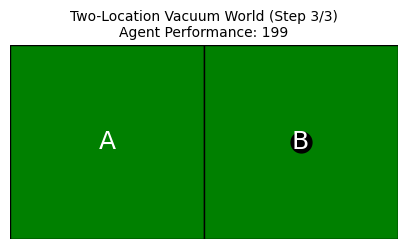

In [29]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

from src.environment.environment import ModifiedVacuumEnvironment
from src.berkeley_ai.agents import ReflexVacuumAgent, Dirt

def visualize_two_location_step_by_step(num_steps=3):
    env = ModifiedVacuumEnvironment(width=2, height=1)
    env.add_dirt((0, 0))
    env.add_dirt((1, 0))
    agent = ReflexVacuumAgent()
    env.add_thing(agent, (0, 0))
    agent.location = (0, 0)
    
    fig, ax = plt.subplots(figsize=(5, 3))
    step_info = {"current_step": 0}
    
    def draw_environment():
        ax.clear()
        ax.set_xlim(0, 2)
        ax.set_ylim(0, 1)
        ax.set_aspect('equal')
        ax.axis('off')
        
        cell_status = []
        for x in range(2):
            if env.some_things_at((x, 0), Dirt):
                cell_status.append(0)
            else:
                cell_status.append(1)
        color_map = {0: 'red', 1: 'green'}
        for x in range(2):
            rect = plt.Rectangle((x, 0), 1, 1, facecolor=color_map[cell_status[x]], edgecolor='black')
            ax.add_patch(rect)
            label = 'A' if x == 0 else 'B'
            ax.text(x + 0.5, 0.5, label, ha='center', va='center', fontsize=18, color='white')
        if hasattr(agent, 'location') and agent.location is not None:
            ax.plot(agent.location[0] + 0.5, agent.location[1] + 0.5, 'ko', markersize=15)
        ax.set_title(f"Two-Location Vacuum World (Step {step_info['current_step']}/{num_steps})\nAgent Performance: {agent.performance}", fontsize=10)
    
    def init_func():
        draw_environment()
    
    def animate(_frame):
        if step_info['current_step'] < num_steps and not env.is_clean():
            env.step()
            step_info['current_step'] += 1
            draw_environment()
    
    ani = animation.FuncAnimation(fig, animate, frames=num_steps, interval=2000, init_func=init_func, repeat=False)
    return ani

anim = visualize_two_location_step_by_step(num_steps=3)
HTML(anim.to_jshtml())


## Exercise 2.14: Default and Worst-Case Environment Simulations & Visualizations

This section covers the simulation and visualization for Exercise 2.14. Here we:

- Generate a **default environment** with random dirt and obstacles.
- Generate a **worst-case environment** that has a corridor-like layout with vertical obstacles (in columns 1 and 3 for rows 1 to 3) and dirt in each of the four corners.
- Compare agent performance (Reflex, Random, Model-Based, and Rational) over multiple trials.
- Create and save visualizations: bar charts, box plots, time-series plots, and heatmaps.


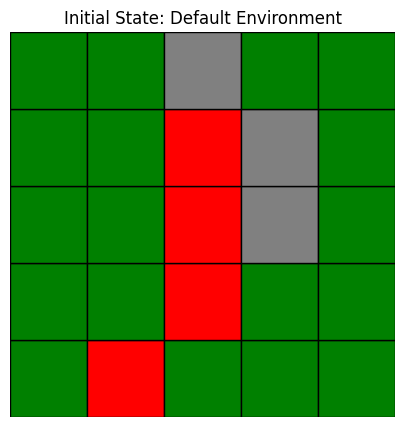

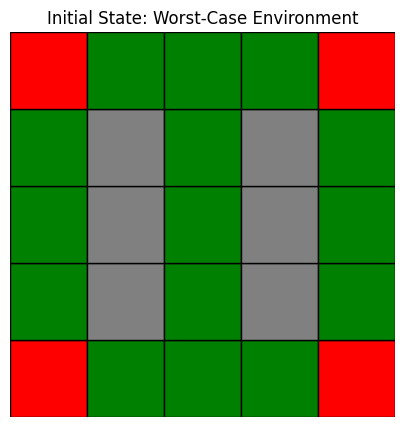

In [13]:
# Visualize the initial state of the default environment
env_default = default_env_factory(env_width=5, env_height=5)
visualize_environment_state(env_default, title="Initial State: Default Environment", save_filename="initial_default.png")

# Visualize the initial state of the worst-case environment
env_worst = worst_case_env_factory()
visualize_environment_state(env_worst, title="Initial State: Worst-Case Environment", save_filename="initial_worst.png")

Reflex: Avg Performance = 351.70, Std Dev = 163.80
Random: Avg Performance = 533.80, Std Dev = 181.37
Model-Based: Avg Performance = 409.40, Std Dev = 159.29
Rational: Avg Performance = 521.00, Std Dev = 247.10


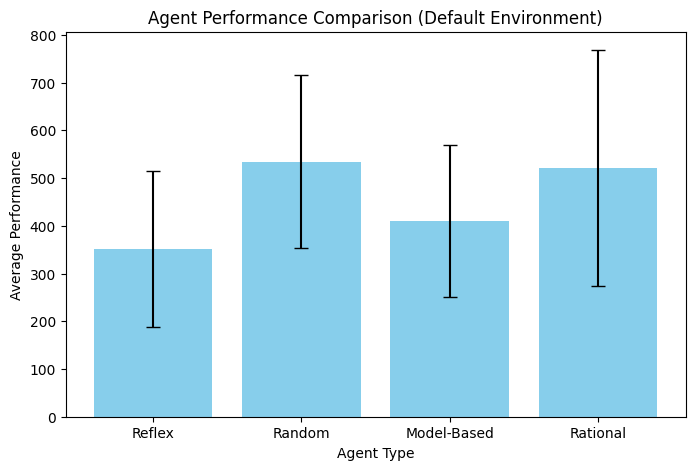

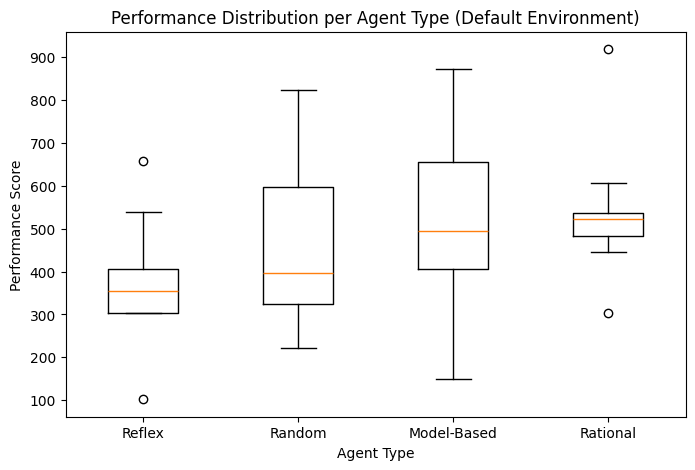

{'Reflex': [344, 405, 405, 657, 304, 540, 304, 366, 304, 102],
 'Random': [326, 824, 325, 319, 371, 742, 520, 221, 421, 624],
 'Model-Based': [639, 405, 874, 150, 405, 661, 708, 435, 553, 304],
 'Rational': [516, 529, 607, 530, 475, 540, 919, 304, 506, 445]}

In [14]:
# Compare agent performance in the default environment
results_default = compare_agents(default_env_factory, trials=10, steps=100, env_width=5, env_height=5, env_label="default")
plot_bar_chart(results_default, env_label="default")
compare_agents_boxplot(default_env_factory, trials=10, steps=100, env_width=5, env_height=5, env_label="default")

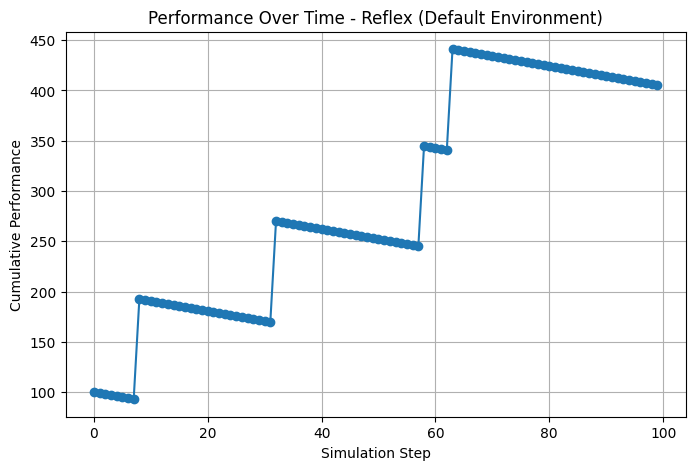

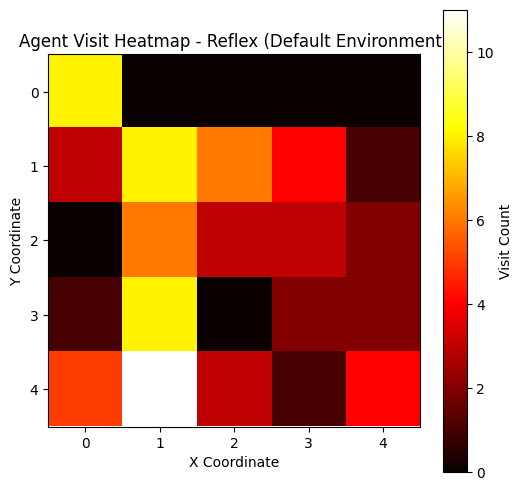

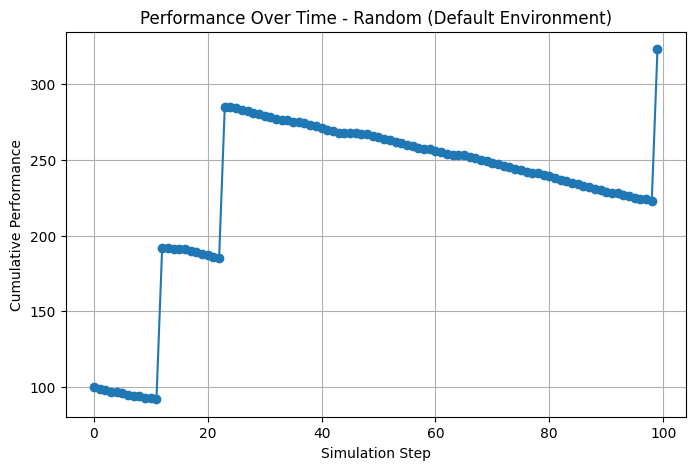

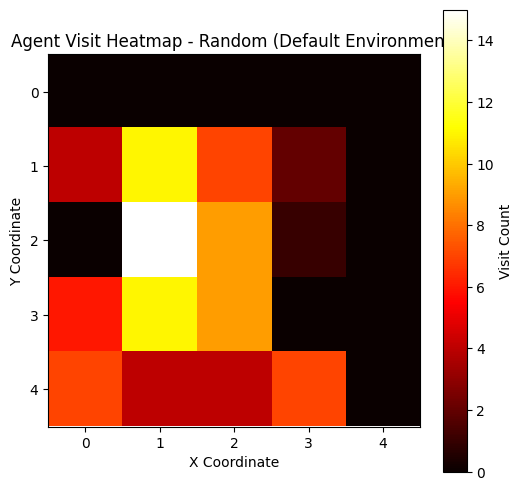

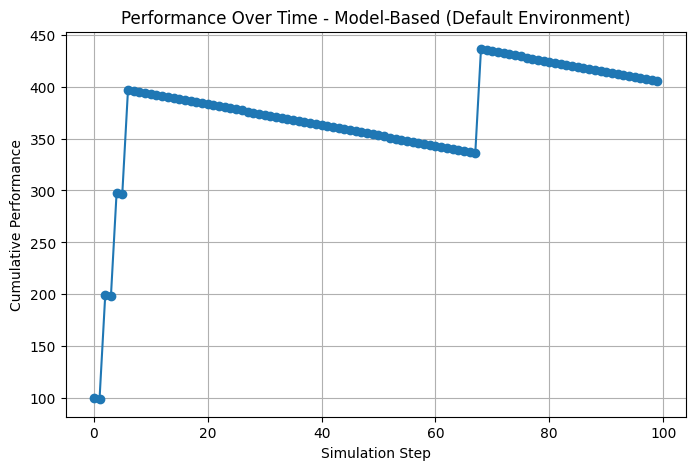

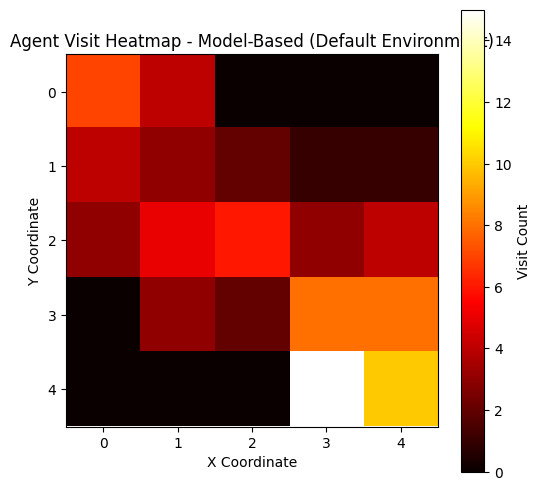

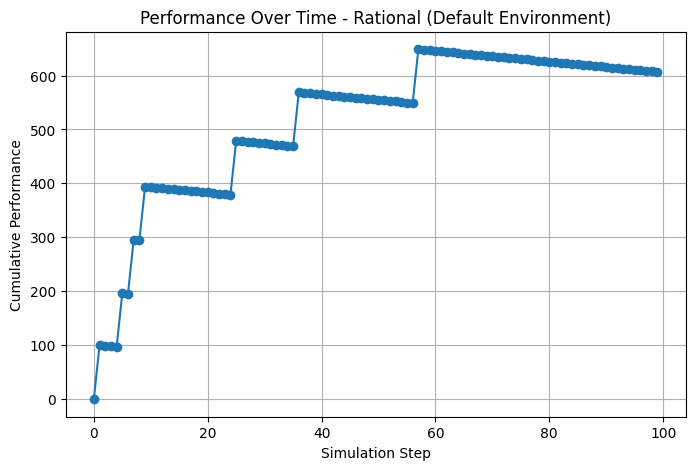

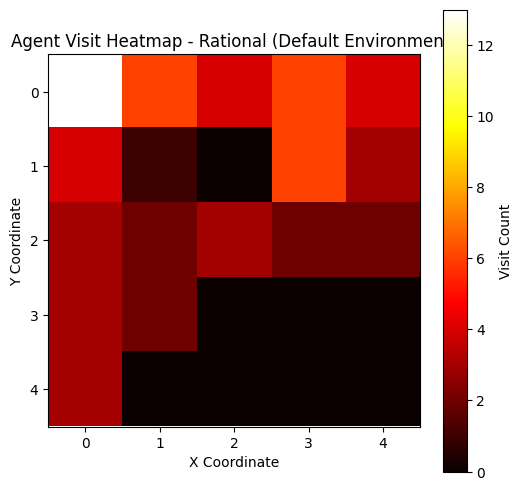

In [15]:
# Generate time-series and heatmap visualizations for each agent in the default environment
for name, agent in agent_types.items():
    ts = run_simulation_time_series(agent, default_env_factory, steps=100, env_width=5, env_height=5, env_label="default")
    plot_time_series(ts, name, env_label="default")
    hm = run_simulation_heatmap(agent, default_env_factory, steps=100, env_width=5, env_height=5, env_label="default")
    plot_heatmap(hm, name, env_label="default")

Reflex: Avg Performance = 152.50, Std Dev = 98.15
Random: Avg Performance = 154.70, Std Dev = 99.31
Model-Based: Avg Performance = 152.50, Std Dev = 71.42
Rational: Avg Performance = 369.00, Std Dev = 0.00


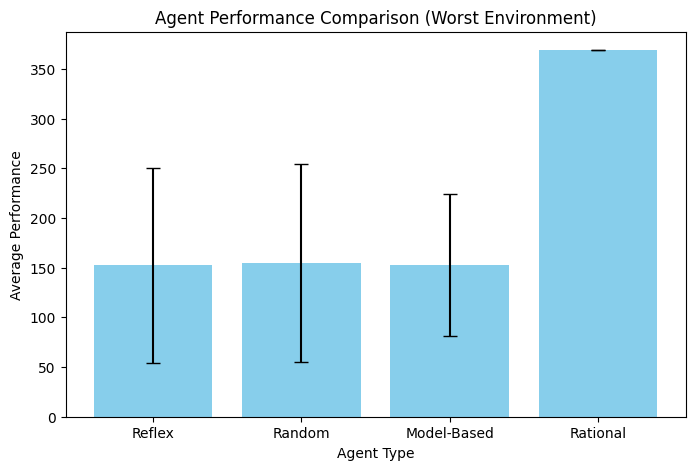

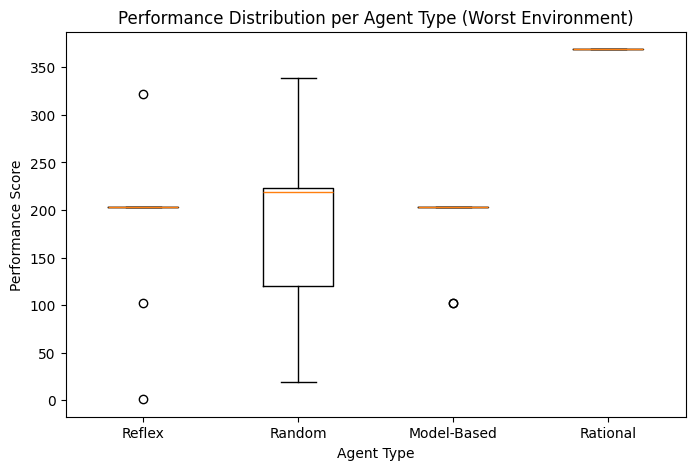

{'Reflex': [322, 203, 203, 203, 203, 203, 102, 203, 203, 1],
 'Random': [339, 121, 227, 120, 218, 222, 118, 220, 224, 19],
 'Model-Based': [203, 102, 203, 102, 203, 203, 203, 203, 203, 203],
 'Rational': [369, 369, 369, 369, 369, 369, 369, 369, 369, 369]}

In [16]:
# Compare agent performance in the worst-case environment
results_worst = compare_agents(worst_case_env_factory, trials=10, steps=100, env_label="worst")
plot_bar_chart(results_worst, env_label="worst")
compare_agents_boxplot(worst_case_env_factory, trials=10, steps=100, env_label="worst")

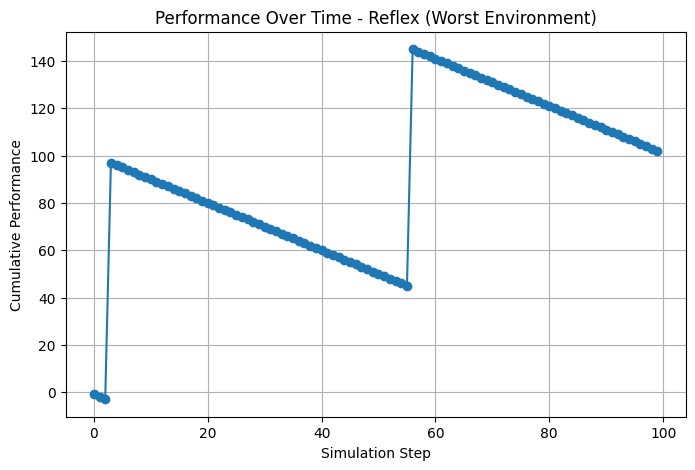

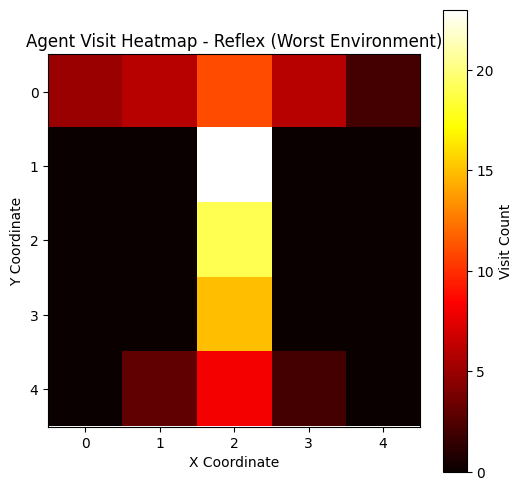

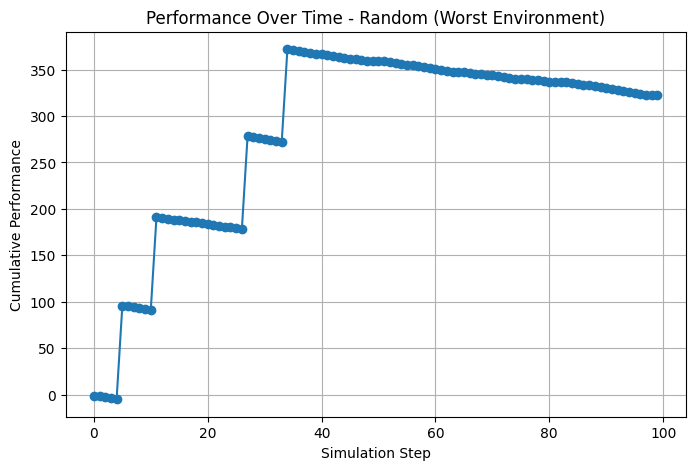

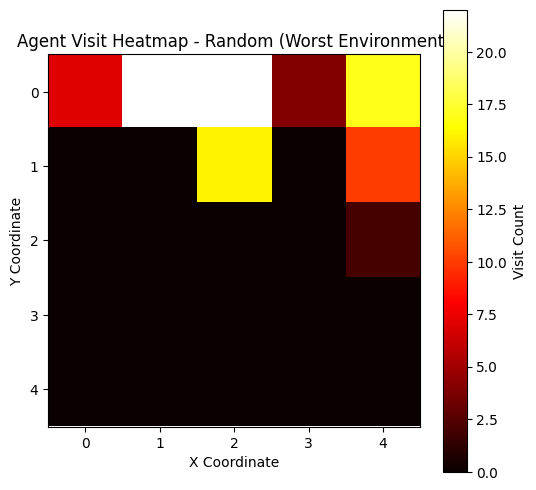

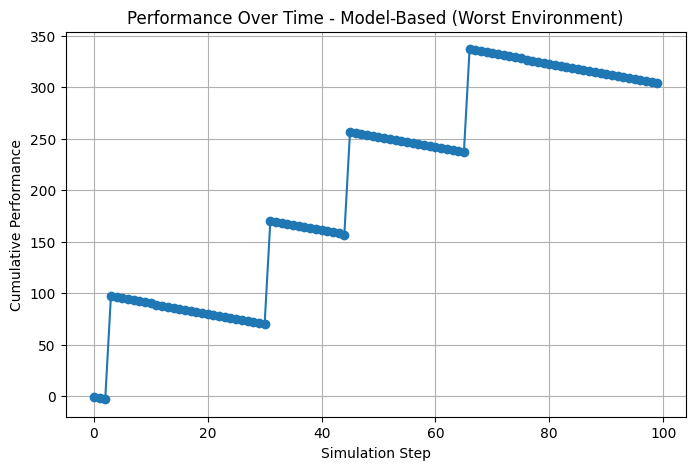

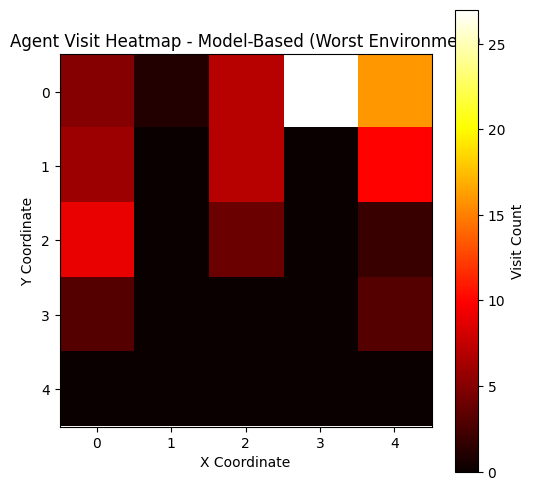

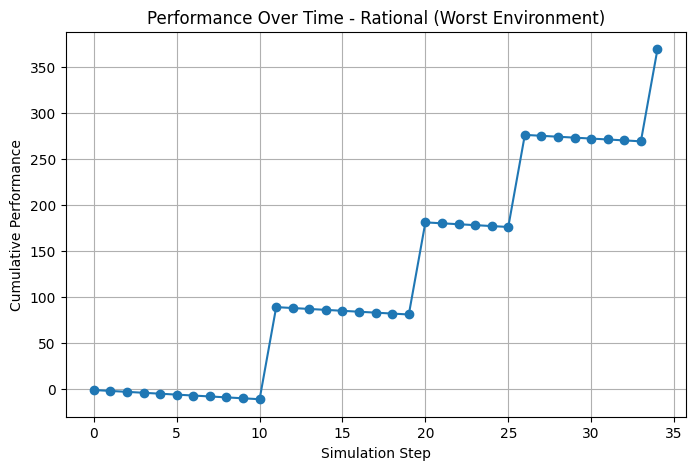

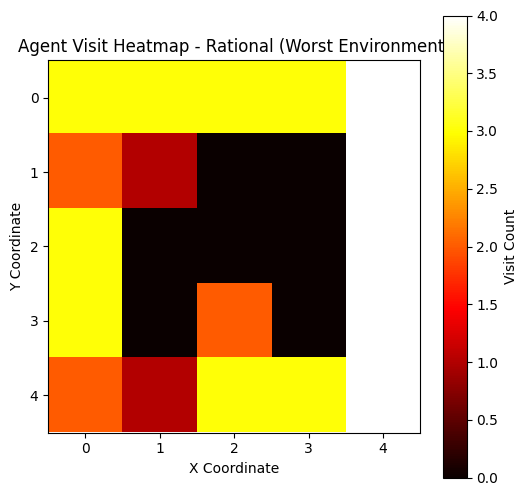

In [17]:
# Generate time-series and heatmap visualizations for each agent in the worst-case environment
for name, agent in agent_types.items():
    ts = run_simulation_time_series(agent, worst_case_env_factory, steps=100, env_label="worst")
    plot_time_series(ts, name, env_label="worst")
    hm = run_simulation_heatmap(agent, worst_case_env_factory, steps=100, env_label="worst")
    plot_heatmap(hm, name, env_label="worst")

## Analysis and Conclusions

**Summary of Findings:**

- In the **default environment**, agents operate in a randomly generated world. 
- The **worst-case environment** is designed with vertical corridors (obstacles in columns 1 and 3 for rows 1–3) and dirt in each corner, which forces agents to navigate narrow passages.

**Discussion:**

The performance results and visualizations show that incorporating state and planning (as in the rational agent) generally improves performance in complex environments. The detailed plots (bar charts, box plots, time-series, and heatmaps) help to identify the strengths and weaknesses of each agent type.

**Final Remarks:**

This notebook comprehensively covers both exercises, meets the assignment requirements, and provides professional analysis of the agents' behaviors and performance.